Mounted at /content/drive
Processing predictions for powerplant: LAKE-1


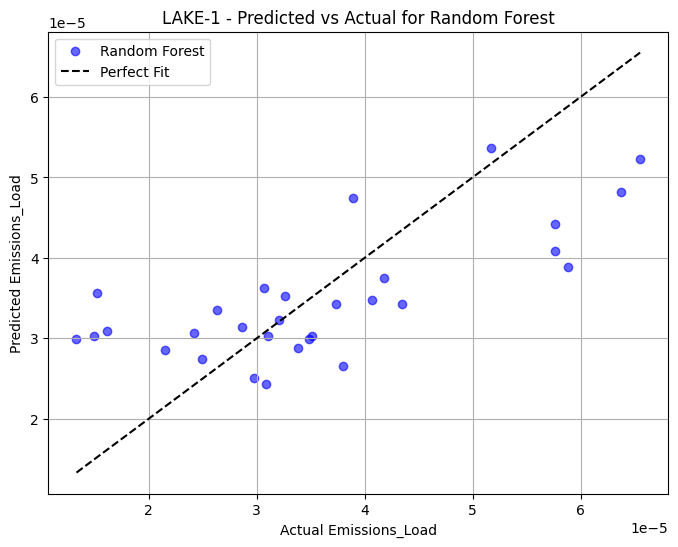

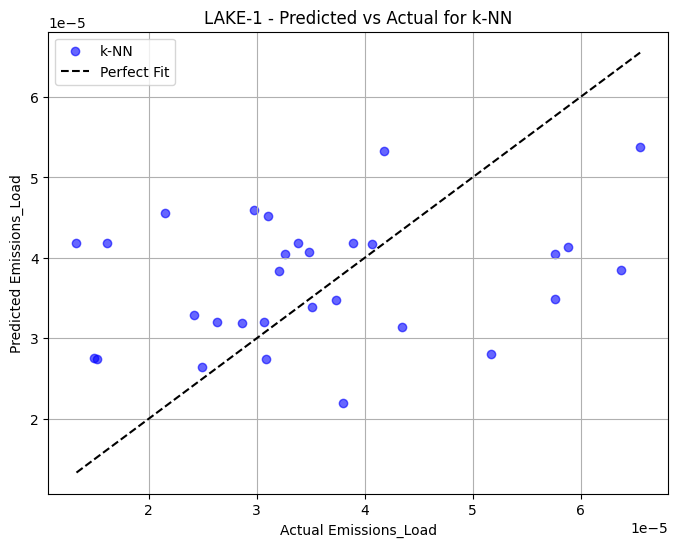

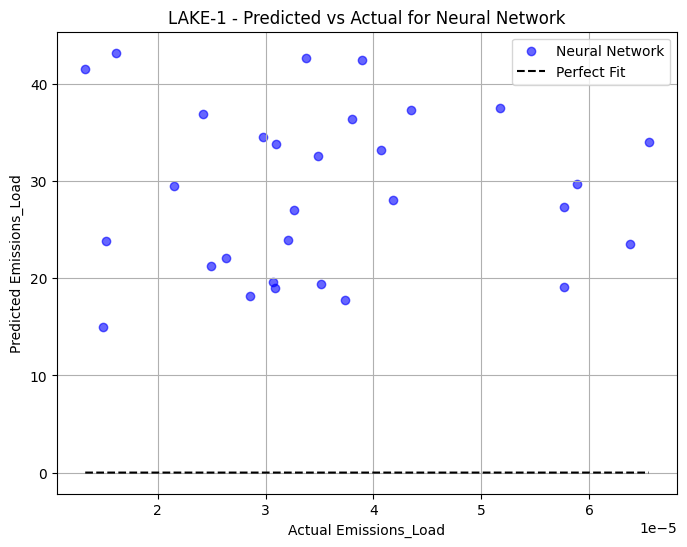

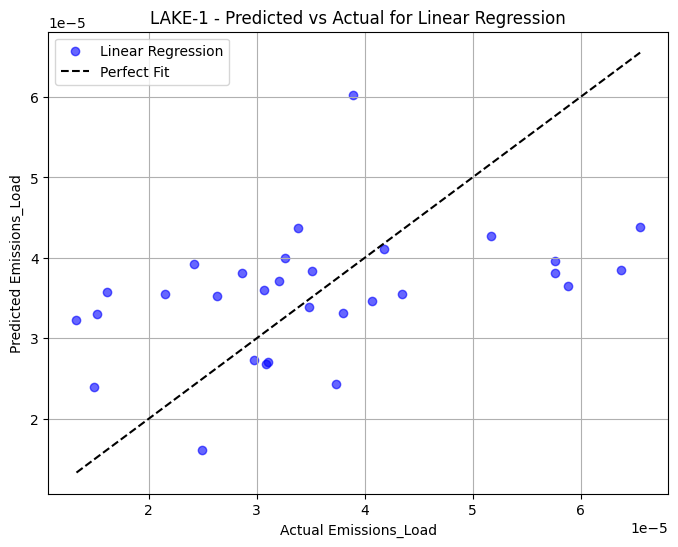

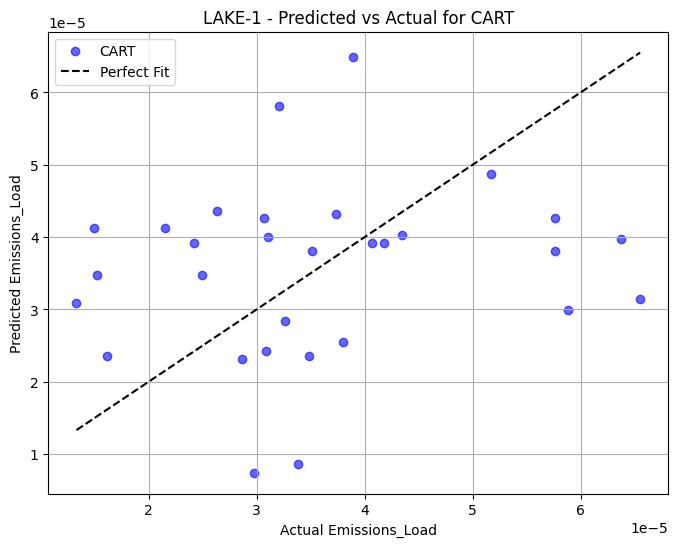

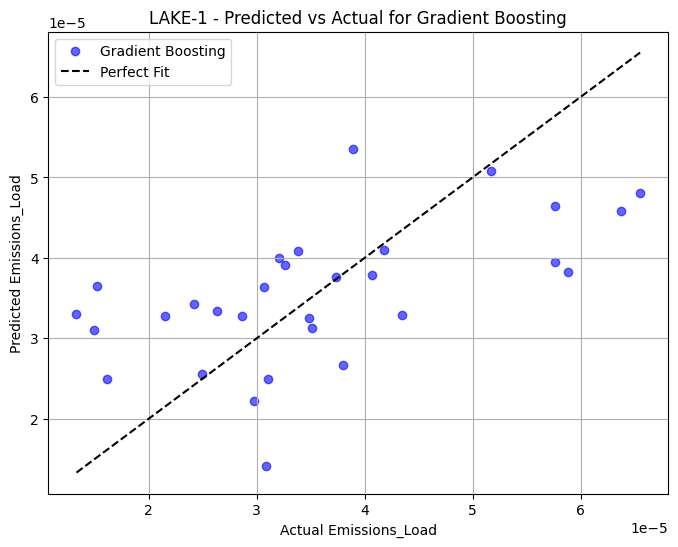

Average Relative Error (%) for powerplant LAKE-1:
  Random Forest: 30.33%
  k-NN: 41.53%
  Neural Network: 97324211.16%
  Linear Regression: 37.78%
  CART: 49.08%
  Gradient Boosting: 34.46%


Processing predictions for powerplant: LAKE-2


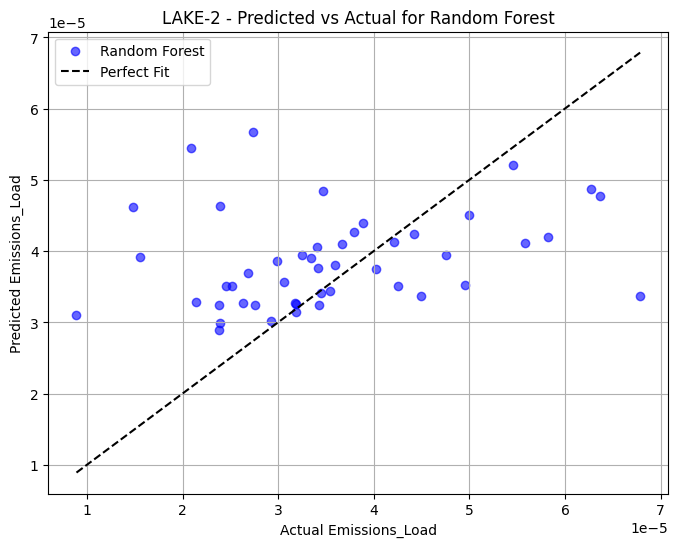

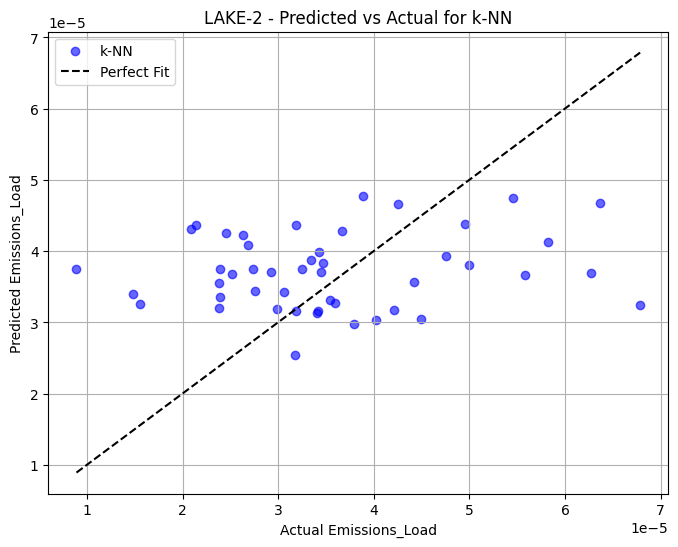

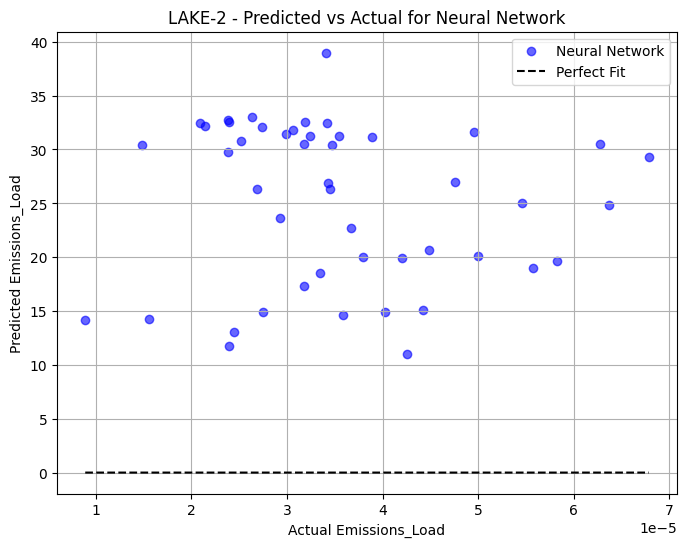

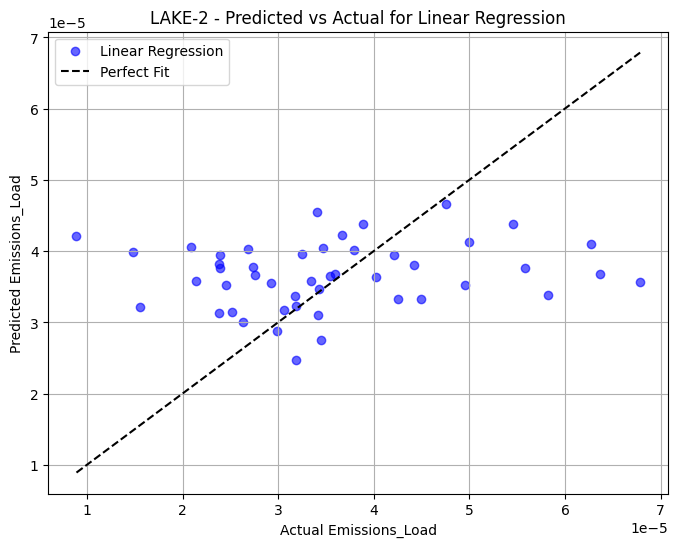

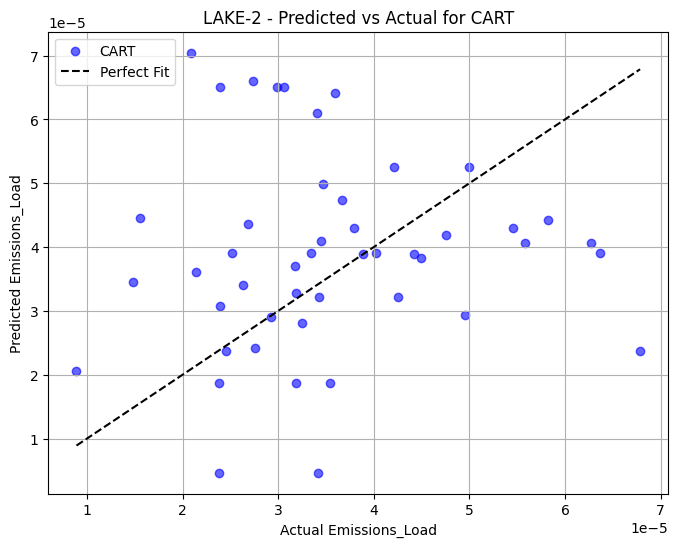

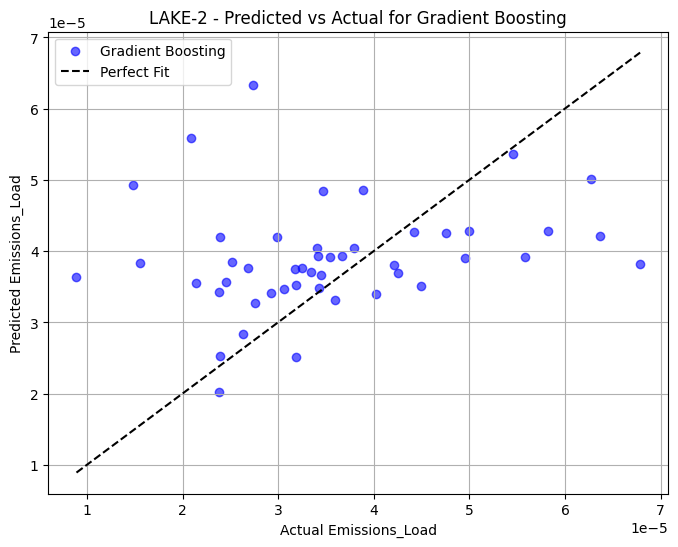

Average Relative Error (%) for powerplant LAKE-2:
  Random Forest: 37.26%
  k-NN: 39.63%
  Neural Network: 81767891.00%
  Linear Regression: 37.83%
  CART: 51.76%
  Gradient Boosting: 40.53%


Processing predictions for powerplant: LAKE-3


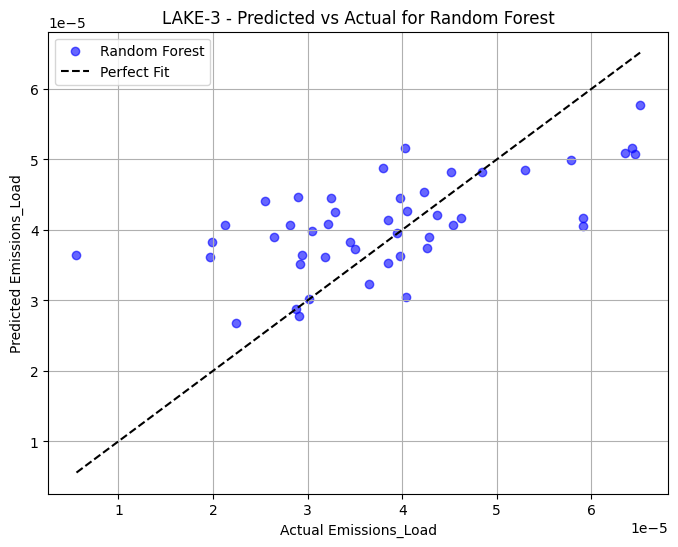

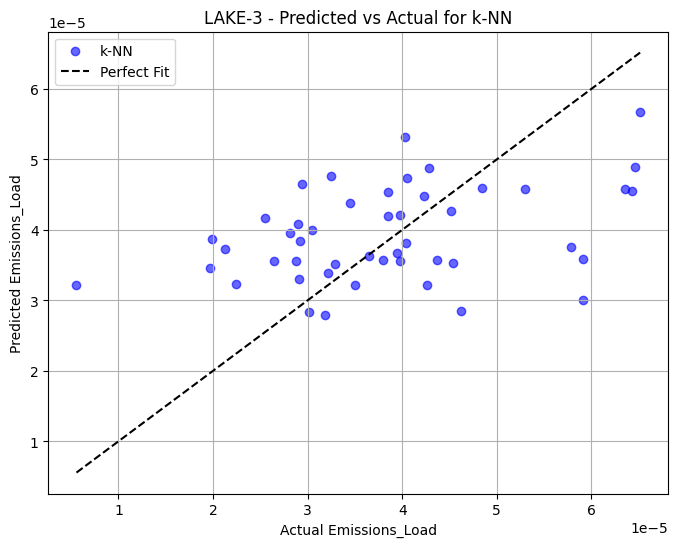

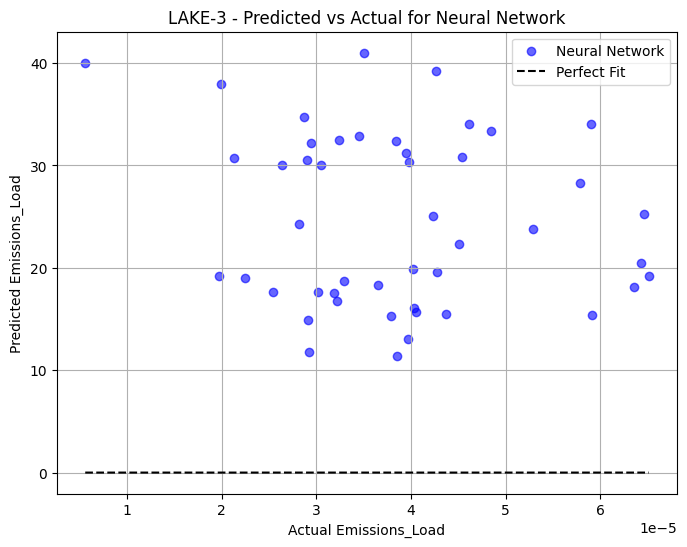

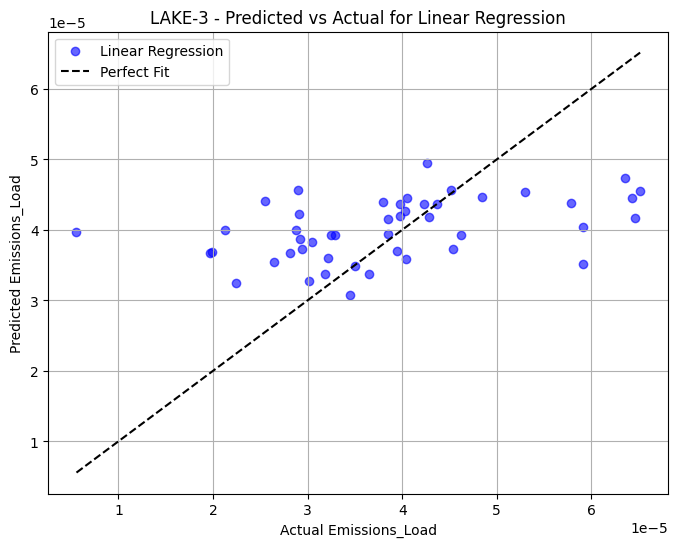

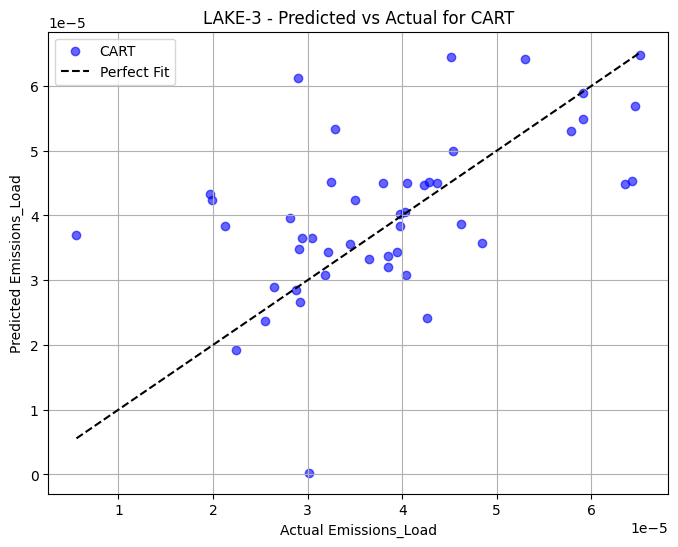

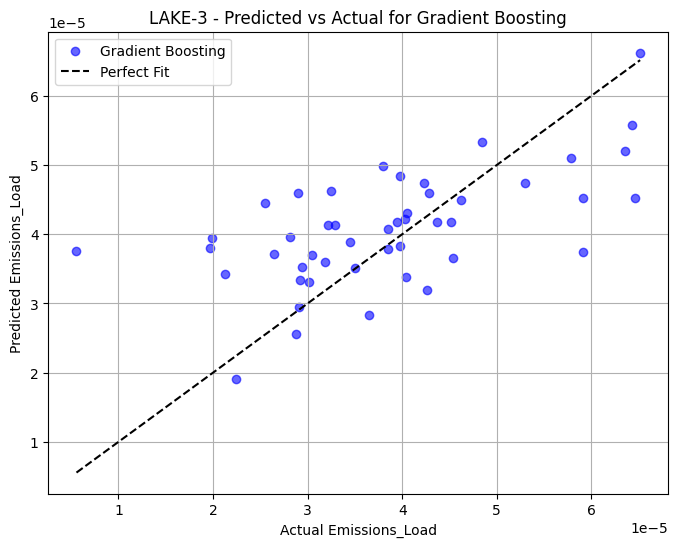

Average Relative Error (%) for powerplant LAKE-3:
  Random Forest: 34.38%
  k-NN: 36.07%
  Neural Network: 82673743.07%
  Linear Regression: 37.03%
  CART: 37.04%
  Gradient Boosting: 34.31%


Processing predictions for powerplant: LAKE-4


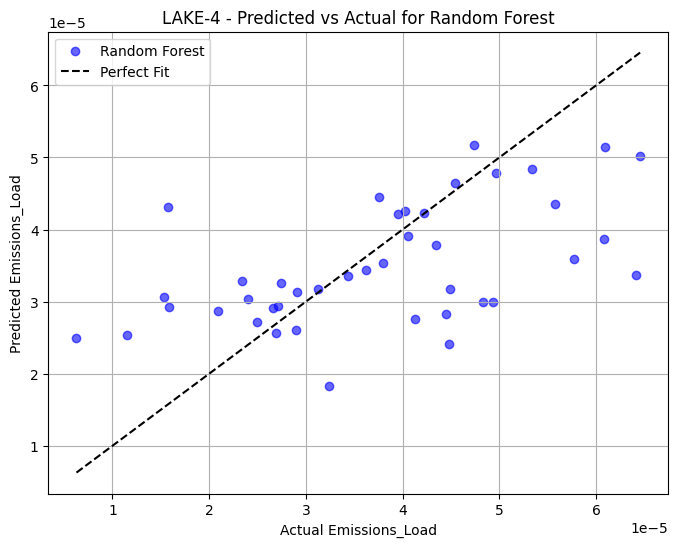

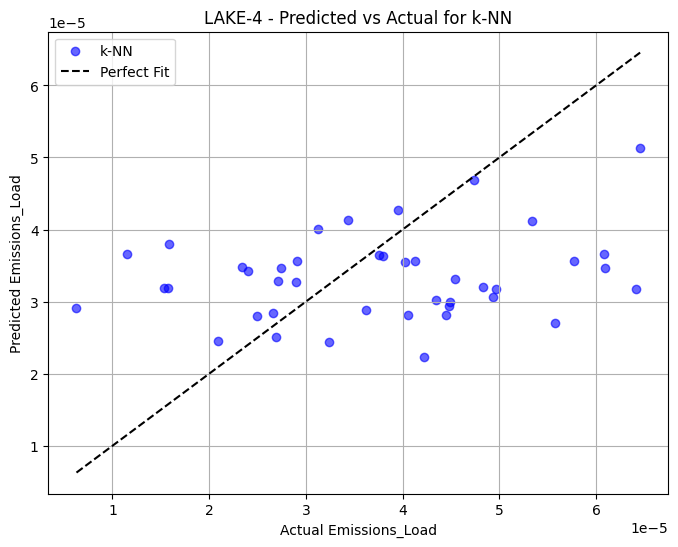

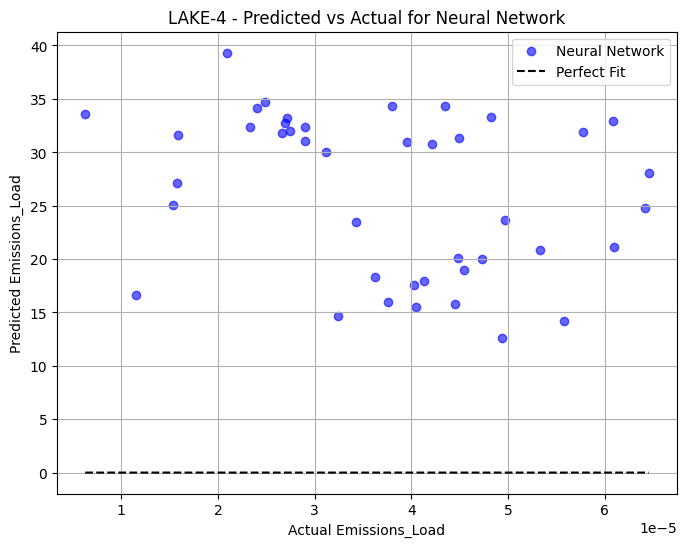

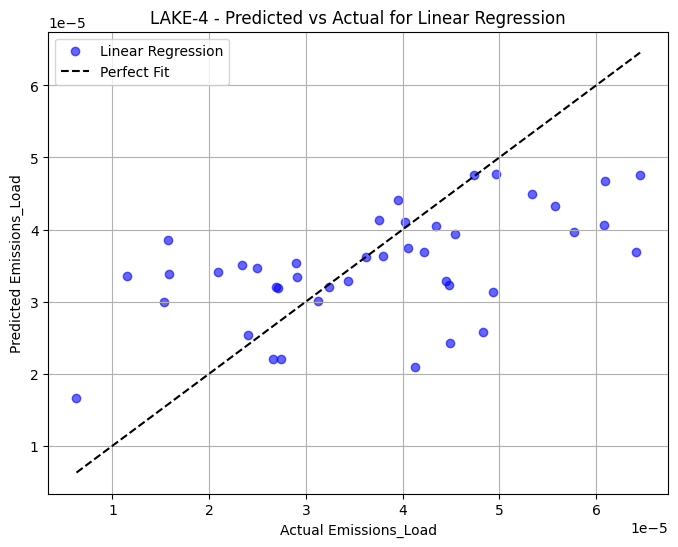

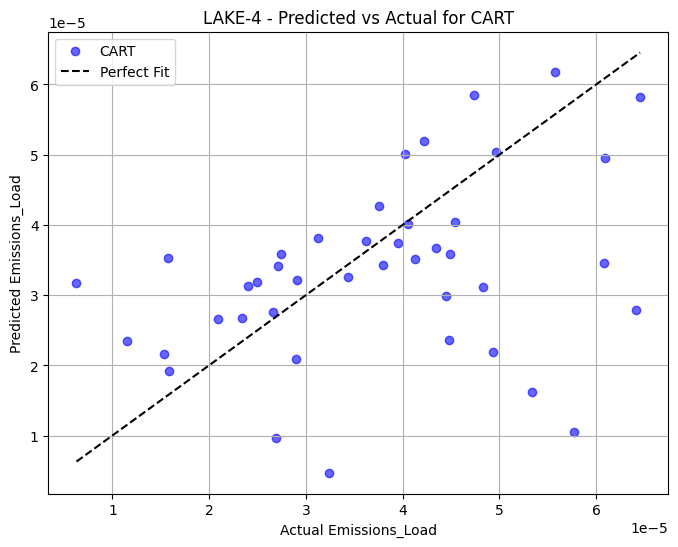

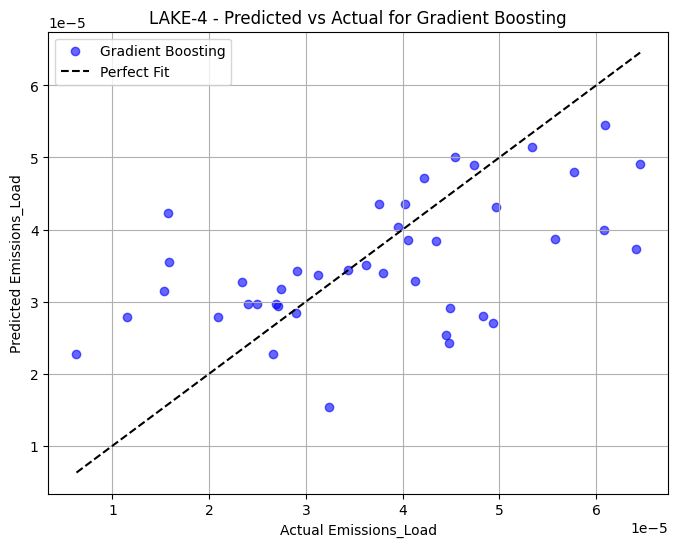

Average Relative Error (%) for powerplant LAKE-4:
  Random Forest: 35.28%
  k-NN: 45.22%
  Neural Network: 93743246.21%
  Linear Regression: 35.40%
  CART: 40.48%
  Gradient Boosting: 36.52%


Global predictions table saved to /content/drive/My Drive/final_predictions_by_powerplant_5.csv


,Date,Actual,Random Forest,Random Forest Residual,Random Forest Relative Error (%),k-NN,k-NN Residual,k-NN Relative Error (%),Neural Network,Neural Network Residual,...,Linear Regression,Linear Regression Residual,Linear Regression Relative Error (%),CART,CART Residual,CART Relative Error (%),Gradient Boosting,Gradient Boosting Residual,Gradient Boosting Relative Error (%),Source
13,2022-06-09,0.000035,0.000030,-0.000005,13.605583,0.000034,-0.000001,3.666333,19.401792,19.401757,...,0.000038,3.203479e-06,9.123465,0.000038,0.000003,8.239388,0.000031,-3.860133e-06,10.993607,LAKE-1
11,2022-06-12,0.000052,0.000054,0.000002,3.801520,0.000028,-0.000024,45.876014,37.509696,37.509644,...,0.000043,-8.939858e-06,17.291151,0.000049,-0.000003,5.837158,0.000051,-8.831448e-07,1.708147,LAKE-1
1,2022-06-18,0.000038,0.000027,-0.000012,30.277024,0.000022,-0.000016,42.351688,36.411914,36.411876,...,0.000033,-4.925493e-06,12.957102,0.000025,-0.000013,32.994828,0.000027,-1.140414e-05,29.999978,LAKE-1
14,2022-06-19,0.000034,0.000029,-0.000005,14.880404,0.000042,0.000008,23.721459,42.639978,42.639944,...,0.000044,9.917829e-06,29.347044,0.000009,-0.000025,74.434541,0.000041,7.003812e-06,20.724412,LAKE-1
22,2022-07-01,0.000024,0.000031,0.000006,26.599915,0.000033,0.000009,35.885194,36.902580,36.902556,...,0.000039,1.497945e-05,61.886550,0.000039,0.000015,61.568175,0.000034,1.000275e-05,41.325688,LAKE-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,2023-08-12,0.000016,0.000029,0.000013,84.512864,0.000038,0.000022,140.024167,31.648569,31.648554,...,0.000034,1.806355e-05,114.111232,0.000019,0.000003,20.909593,0.000036,1.973070e-05,124.642952,LAKE-4
164,2023-08-13,0.000023,0.000033,0.000009,40.552223,0.000035,0.000011,48.745367,32.326120,32.326097,...,0.000035,1.176127e-05,50.367181,0.000027,0.000003,14.655765,0.000033,9.331487e-06,39.961736,LAKE-4
127,2023-08-15,0.000045,0.000024,-0.000021,46.080743,0.000029,-0.000015,34.373495,20.109386,20.109341,...,0.000032,-1.247262e-05,27.827717,0.000024,-0.000021,47.427128,0.000024,-2.062445e-05,46.015319,LAKE-4
136,2023-08-28,0.000036,0.000034,-0.000002,4.964530,0.000029,-0.000007,20.618028,18.324466,18.324430,...,0.000036,-1.078296e-07,0.297444,0.000038,0.000001,3.848113,0.000035,-1.220839e-06,3.367640,LAKE-4


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import models
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor  # CART model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Mount Google Drive (if running in Colab)
from google.colab import drive
drive.mount('/content/drive')

# Load dataset from online location
data_url = "https://raw.githubusercontent.com/apownukepcc/ForecastingDailyEmissions/refs/heads/main/SO2TONS_dataset.csv"
data = pd.read_csv(data_url)

# Convert the 'date' column to datetime
data['date'] = pd.to_datetime(data['date'])

# Define peak season months (May through August)
peak_season_months = [5, 6, 7, 8]
data = data[data['date'].dt.month.isin(peak_season_months)]

# Define predictors and target variable
predictors = ['tavg', 'tmin', 'tmax', 'prcp', 'snow', 'wdir', 'wspd', 'pres']
target = 'Emissions_Load'

# Drop rows with missing values (for predictors and target)
data = data.dropna(subset=predictors + [target])

# Define the predictive models (SVM removed)
models = {
    "Random Forest": RandomForestRegressor(random_state=42),
    "k-NN": KNeighborsRegressor(n_neighbors=5),
    "Neural Network": MLPRegressor(hidden_layer_sizes=(50, 50), max_iter=500, random_state=42),
    "Linear Regression": LinearRegression(),
    "CART": DecisionTreeRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

# Create an empty DataFrame to store the predictions for all powerplants
all_predictions_table = pd.DataFrame()

# Loop over each unique powerplant in the 'Source' column
for source in data['Source'].unique():
    print(f"Processing predictions for powerplant: {source}")

    # Filter the data for the current powerplant
    data_source = data[data['Source'] == source].copy()

    # (Optional) Check if there is enough data for meaningful predictions
    if data_source.shape[0] < 10:  # adjust this threshold as needed
        print(f"Not enough data for {source}, skipping...\n")
        continue

    # Split the filtered data into features and target
    X = data_source[predictors]
    y = data_source[target]

    # Split into training and testing sets (using a fixed random state for reproducibility)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Dictionary to hold predictions for the current powerplant
    predictions = {}

    # Train each model and store its predictions
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        predictions[model_name] = y_pred

    # Create a predictions table for the current powerplant
    pred_table = pd.DataFrame({
        "Date": data_source.loc[X_test.index, 'date'],
        "Actual": y_test
    })

    # For each model, add its prediction, residual error, and relative error (%) columns
    for model_name, y_pred in predictions.items():
        pred_table[model_name] = y_pred
        pred_table[model_name + " Residual"] = y_pred - pred_table["Actual"]
        pred_table[model_name + " Relative Error (%)"] = (np.abs(pred_table[model_name + " Residual"]) / pred_table["Actual"]) * 100

        # Plot predicted vs. actual for each model
        plt.figure(figsize=(8, 6))
        plt.scatter(y_test, y_pred, alpha=0.6, label=model_name, color='blue')
        plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', label="Perfect Fit")
        plt.xlabel("Actual Emissions_Load")
        plt.ylabel("Predicted Emissions_Load")
        plt.title(f"{source} - Predicted vs Actual for {model_name}")
        plt.legend()
        plt.grid(True)
        plt.show()

    # Add the powerplant source identifier to the table
    pred_table["Source"] = source

    # Append this powerplant's predictions to the global table
    all_predictions_table = pd.concat([all_predictions_table, pred_table], ignore_index=True)

    # Print average relative error for each model for the current powerplant
    print(f"Average Relative Error (%) for powerplant {source}:")
    for model_name in models.keys():
        col_name = model_name + " Relative Error (%)"
        avg_rel_error = pred_table[col_name].mean()
        print(f"  {model_name}: {avg_rel_error:.2f}%")
    print("\n")

# Sort the global predictions table by Source and Date
all_predictions_table.sort_values(by=["Source", "Date"], inplace=True)

# Save the global predictions table to a CSV file on Google Drive
csv_path = '/content/drive/My Drive/final_predictions_by_powerplant_5.csv'
all_predictions_table.to_csv(csv_path, index=False)
print(f"Global predictions table saved to {csv_path}")

# Optionally display the global predictions table
display(all_predictions_table)
